In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

!pip install tensorboard ultralytics
!pip install ultralytics --upgrade

from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 24.8 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00:00:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.4 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 2.3 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 11.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 7.9 MB/s eta 0:00:00:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 54.1 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.8.93
    Uninstalling nvidia-nvjitlink-cu12-12.8.93:
      Successfully uninstalled nvidia-nvjitlink-cu12-12.8.93
  Attempting uninstall: nvidia-curand-cu12
    Found existing inst


0: 416x640 1 id, 43.0ms
Speed: 14.9ms preprocess, 43.0ms inference, 294.3ms postprocess per image at shape (1, 3, 416, 640)


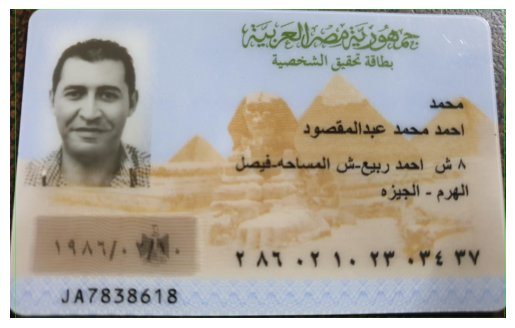

In [2]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model (you can try any one )
model = YOLO("/kaggle/input/model1/pytorch/default/1/best.pt")

# Load a test image
image_path = "/kaggle/input/test-images/images/20220817_140950_jpg.rf.62fe1c455743c06609f85be5bfde1ea4.jpg"
image = cv2.imread(image_path)
results = model(image)

# Plot the image with detections
for result in results:
    # Plot boxes on image
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


0: 416x640 1 Address, 1 Birth, 1 Factory, 1 ID_F, 1 Name, 6.7ms
Speed: 2.3ms preprocess, 6.7ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


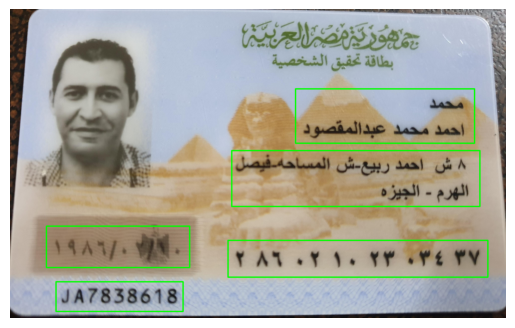

In [4]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model (you can try any one )
model = YOLO("/kaggle/input/model2/pytorch/default/1/best.pt")

# Load a test image
image_path = "/kaggle/input/test-images/images/20220817_140950_jpg.rf.62fe1c455743c06609f85be5bfde1ea4.jpg"
image = cv2.imread(image_path)
results = model(image)

# Plot the image with detections
for result in results:
    # Plot boxes on image
    for box in result.boxes.xyxy:
        x1, y1, x2, y2 = map(int, box)
        cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 10)

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


0: 384x640 1 id, 33.0ms
Speed: 1.5ms preprocess, 33.0ms inference, 1.4ms postprocess per image at shape (1, 3, 384, 640)

0: 416x640 1 Address, 1 Birth, 1 Factory, 1 ID_F, 1 Name, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


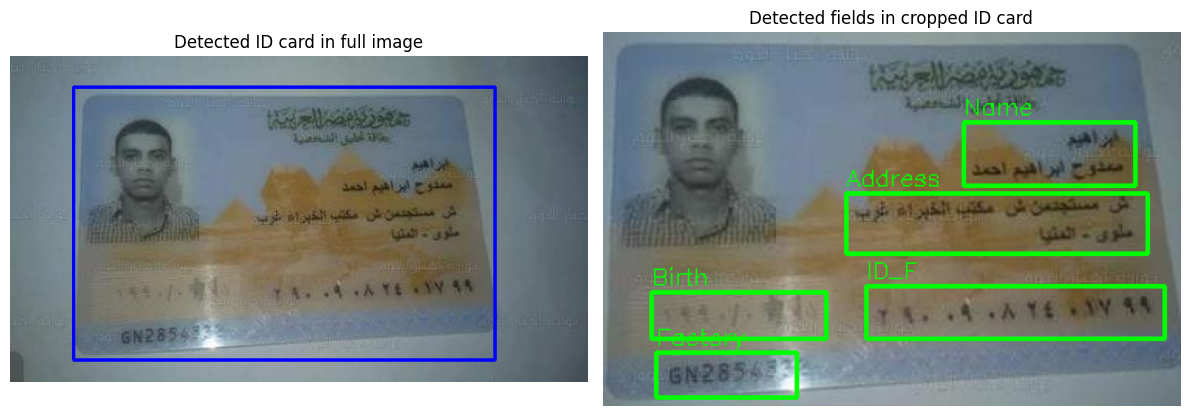

In [5]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load both models
model1 = YOLO("/kaggle/input/model1/pytorch/default/1/best.pt")  # Detect ID
model2 = YOLO("/kaggle/input/model2/pytorch/default/1/best.pt")  # Detect fields

# Load test image
image_path = "/kaggle/input/test-images/images/46_jpg.rf.239409f5d717b3b72df53ef29b38a993.jpg"
image = cv2.imread(image_path)
image_copy = image.copy()

# --- Step 1: Detect ID card using model1 ---
result1 = model1(image)[0]

if len(result1.boxes) == 0:
    print("❌ No ID card detected.")
else:
    # Get the first detected ID card bounding box
    id_box = result1.boxes.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = id_box

    # Draw ID card bounding box on original image
    cv2.rectangle(image_copy, (x1, y1), (x2, y2), (255, 0, 0), 2)  # Blue box

    # Crop the ID card
    id_crop = image[y1:y2, x1:x2]

    # --- Step 2: Detect fields inside cropped ID using model2 ---
    result2 = model2(id_crop)[0]

    for box, cls_id in zip(result2.boxes.xyxy, result2.boxes.cls):
        fx1, fy1, fx2, fy2 = map(int, box.cpu().numpy())
        label = model2.names[int(cls_id.item())]

        # Draw field boxes in the cropped image
        cv2.rectangle(id_crop, (fx1, fy1), (fx2, fy2), (0, 255, 0), 2)  # Green box
        cv2.putText(id_crop, label, (fx1, fy1 - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0,255,0), 1)

    # --- Show both images ---
    plt.figure(figsize=(12, 6))

    # Image with ID box
    plt.subplot(1, 2, 1)
    plt.title("Detected ID card in full image")
    plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    # Cropped ID with fields
    plt.subplot(1, 2, 2)
    plt.title("Detected fields in cropped ID card")
    plt.imshow(cv2.cvtColor(id_crop, cv2.COLOR_BGR2RGB))
    plt.axis("off")

    plt.tight_layout()
    plt.show()



0: 416x640 1 Address, 1 Birth, 1 Factory, 1 ID_F, 1 Name, 6.9ms
Speed: 2.4ms preprocess, 6.9ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 640)


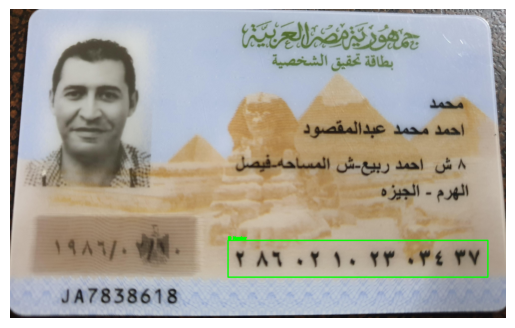

In [11]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained model
model = YOLO("/kaggle/input/model2/pytorch/default/1/best.pt")

# Load a test image
image_path = "/kaggle/input/test-images/images/20220817_140950_jpg.rf.62fe1c455743c06609f85be5bfde1ea4.jpg"
image = cv2.imread(image_path)

# Run prediction
results = model(image)

# Define the class index for the ID number (change if different)
ID_NUMBER_CLASS = 6  # <-- make sure 0 is 'id_number' in your dataset.yaml

# Go through results
for result in results:
    boxes = result.boxes
    for i in range(len(boxes)):
        class_id = int(boxes.cls[i])  # Get class ID
        if class_id == ID_NUMBER_CLASS:
            x1, y1, x2, y2 = map(int, boxes.xyxy[i])  # Get coordinates
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 10)
            cv2.putText(image, "ID Number", (x1, y1 - 10),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 10)

# Show the result
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()